# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 27th, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

In [ ]:
# Declarations
!pip install networkx
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import networkx as nx
import math

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Part 1: Binning degree distributions

### A. Binning real numbers

* Generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [ ]:
np.random.seed(1000)
gaussian_distribution = np.random.normal(2, 0.125, 5000)

* Bin data points into 10 bins

In [ ]:
histogram_array, bins_array = np.histogram(gaussian_distribution, bins = 10)
print(f'=== Histogram array ===\n {histogram_array}')
print(f'Length of histogram array is : {histogram_array.size}')
print(f'\n=== Bins array ===\n {bins_array}')
print(f'Length of bins array is : {bins_array.size}')

=== Histogram array ===
 [   7   46  197  641 1176 1327 1041  437  107   21]
Length of histogram array is : 10

=== Bins array ===
 [1.52311306 1.61262702 1.70214097 1.79165493 1.88116889 1.97068285
 2.06019681 2.14971077 2.23922473 2.32873869 2.41825265]
Length of bins array is : 11


`numpy.histogram` returns two arrays - `hist` (referred to `histogram_array`), and `bin_edges` (`bins_array`). `histogram_array` return the count of values in each bin. `bins_array` - displays the lower bounds of each of the bins, however for the last bin it includes the upper bound as well.

* Plot the binned data

Since `bins_array` contains the upper bound of the last bin, we would need to drop it (`bins_array[:-1]`) because all other bins are exclusive of upper bounds. If we don't drop it python throws error and does not display the histogram. However, since we have been instructed to use specifically `matplotlib.pyplot.plot` - we notice a continous line displayed (that is expected because we draw data points from a continous distribution), instead of separate vertical bars (regular histogram). We added dark blue vertical gridlines to tell the bins apart.

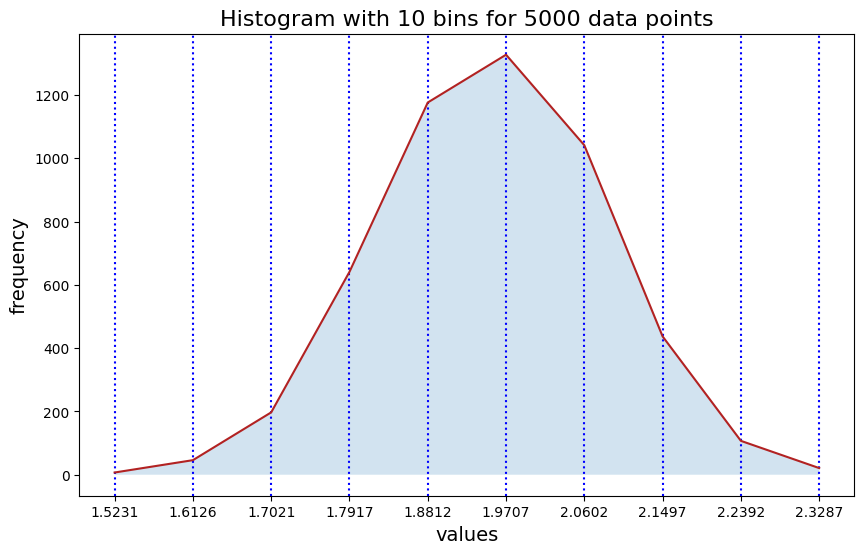

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bins_array[:-1],histogram_array,color='firebrick')
ax.fill_between(bins_array[:-1], histogram_array,alpha=0.2)
ax.set_xticks(bins_array[:-1],minor=False, rotation=45)
ax.set_ylabel('frequency',size=14)
ax.set_xlabel('values', size = 14)
ax.set_title('Histogram with 10 bins for 5000 data points', size=16)
ax.xaxis.grid(True, which='major',color='blue', linestyle=':',linewidth=1.5)
plt.show()

### B. Binning integers

* Generate 5000 numbers from Poisson distribution 

5000 random data point are generated from a Poisson distribution with $\lambda = 10$. The maximum and minimum value is found and printed:

In [ ]:
np.random.seed(1)
poisson_distribution = np.random.poisson(lam=10, size=5000)
print(f'Maximum value : {poisson_distribution.max()}')
print(f'Minimum value : {poisson_distribution.min()}')

Maximum value : 24
Minimum value : 0


* Vector $v$ containing the number of bins

Now a vector v containing bins that puts each integer in its own bin is created

Since Poisson distribution is discrete, the elements in the vector $v$ correspond to the boundaries of each bin.
However when applying `np.histogram`, Python considers the last element in the bin array as the upper bound of the last bin, and thus our vector $v$ gets truncated. 
Hence the difference : 22 (elements in histogram array) vs 23 (size of vector $v$). Therefore, it is not correct to use the last entry of $v$ as the highest value, we should proceed as in the previous example.

In [ ]:
v = np.unique(poisson_distribution)
hist_arr, bins_arr = np.histogram(poisson_distribution, bins=v)
print(50*'-')
print(f'Sum over the bin counts : {hist_arr.sum()}')
print(50*'-')
print(f'Size of the vector v (expected nr of bins): {v.size}')
print(50*'-')
print(f'Number of elements in histogram array  : {hist_arr.size}')
print(50*'-')
print(f'Number of bins in the histogram : {bins_arr.size}')

--------------------------------------------------
Sum over the bin counts : 5000
--------------------------------------------------
Size of the vector v (expected nr of bins): 25
--------------------------------------------------
Number of elements in histogram array  : 24
--------------------------------------------------
Number of bins in the histogram : 25


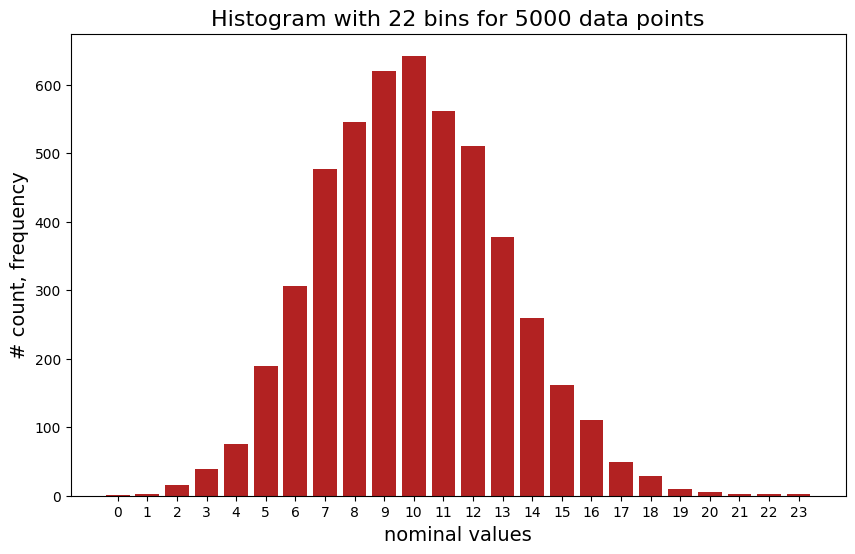

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bins_arr[:-1],hist_arr,color='firebrick')


ax.set_xticks(bins_arr[:-1],minor=False, rotation=45)
ax.set_ylabel('# count, frequency',size=14)
ax.set_xlabel('nominal values', size = 14)
ax.set_title('Histogram with 22 bins for 5000 data points', size=16)

plt.show()

### C. Binning and plotting degree distributions

* Generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above

An ER network is generated with $N = 5000$ nodes. To find the value **p** that corresponds to an average degree of $k = 10$ since $\lambda$ in a Poisson distribution corresponds to the average degree. We exploit that $k = p(N-1)$, which can give us $p = \frac{k}{(N-1)} = \frac{10}{(5000-1)} = 0.002$.

In [ ]:
""" Create ER network """
k = 10
N = 5000
p = k/(N-1)
# p=0.002
ER_network = nx.erdos_renyi_graph(5000,p,seed=1)
# nx.draw(ER_network,with_labels=False)
# plt.show()

* Degree distribution

With N and p we can now create the ER network with Networkx. The degree distribution of the network is extracted and plotted.

In [ ]:
# drop first pairwise element (0,0) - it carries no meaning (no isolated nodes)
degree_distribution_array = nx.degree_histogram(ER_network)

print(f'The nodes of the network have the following degrees :')
print('--------------------------------------------')
print(np.arange(1,np.size(degree_distribution_array)),'\n')

print(f'Frequency for each of the degree :')
print('-----------------------------------')
print(degree_distribution_array[1:])

The nodes of the network have the following degrees :
--------------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] 

Frequency for each of the degree :
-----------------------------------
[5, 8, 32, 103, 214, 307, 446, 575, 629, 638, 551, 467, 360, 263, 171, 110, 57, 32, 14, 11, 5, 2]


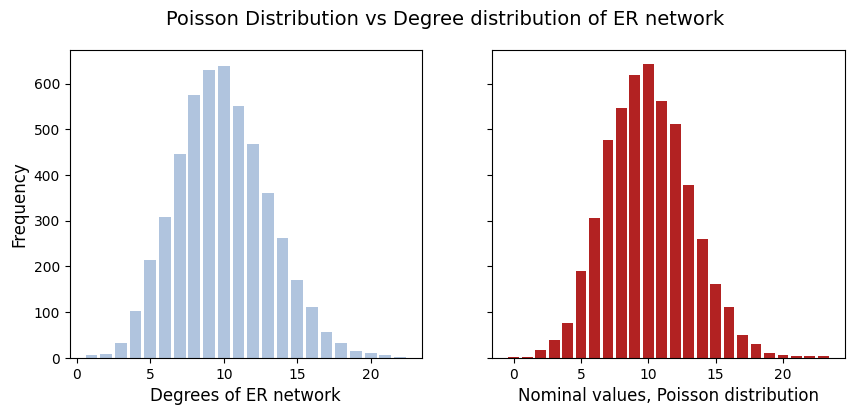

In [ ]:
degr = np.arange(np.size(degree_distribution_array))[1:]
freq = np.array(degree_distribution_array)[1:]
fig, axarr = plt.subplots(1,2,figsize=(10,4),sharey='all')
axarr[0].bar(degr,freq,color='lightsteelblue')
axarr[0].set_xlabel('Degrees of ER network',size=12)
axarr[0].set_ylabel('Frequency', size = 12)

axarr[1].bar(bins_arr[:-1],hist_arr,color='firebrick')
axarr[1].set_xlabel('Nominal values, Poisson distribution', size = 12)
plt.suptitle('Poisson Distribution vs Degree distribution of ER network', size = 14)
plt.subplots_adjust()
plt.show()

From the plot it appears clearly that the distribution is similar to the Poisson distribution with $\lambda = 10$. 

# Part 2. Random networks and plotting in networkx

### A. NS Exercise 3.1
Erdos-Renyi Network with $N = 3000$ nodes, connected to each other with probability $p=10^{-3}$

* __What is the expected number of links?:__ The expected number of links is given by: $L = p\cdot \frac{N(N-1)}{2}$

In [ ]:
p = 10**(-3)
N = 3000
L = 0.5*p*N*N - 0.5*p*N
print(f'L = {round(L)}')

L = 4498


* __In which regime is the network?:__
$$
 \begin{equation}
    Network Regime = 
    \begin{cases}
    1 & \text{subcritical, if $0 < Average Degree < 1$}\\
    2 & \text{critical point, if $Average Degree = 1$} \\
    3 & \text{supercritical regime, if $Average Degree > 1$ and $Average Degree < \ln{N}$} \\
    4 & \text{connected regime, if $Average Degree > ln(N)$}\\
    \end{cases}
    \end{equation}
$$

In [ ]:
if p*(N-1)<1:
    regime = 'subcritical regime'
elif p*(N-1) ==1:
    regime = 'critical point'
elif p*(N-1)>1:
    regime ='supercritical regime'
elif p*(N-1)>np.log(N):
    regime = 'connected'
print(f'Average Degree = {p*(N-1)}\nNetwork is in {regime}.')

Average Degree = 2.999
Network is in supercritical regime.


Since the average degree is $2.999$ we can say that it is located in the supercritical regime since it's greater than 1 and less than the $\ln N$.

* __Calculate the probability $p_c$ so that the network is at the critical point.:__ The network is at the critical point when $\langle k \rangle> = 1$ meaning that $p = \frac{1}{N}$

In [ ]:
print('Critical point reached when probability p = {:.4f}'.format(1/N))

Critical point reached when probability p = 0.0003


__Given the linking probability $p = 10^{-3}$ calculate the number of nodes $N^{cr}$ so that the network has only one component.__

* For sufficiently large values of p: $p > \frac{\ln{N}}{N}$ all nodes and components get absorbed into one. Subtstituting for $p=10^{-3}$ we obtain $0.001\cdot N > \ln{N}$.  However, for the giant component to be the only one, the network should become fully connected, otherwise we might have lone components here and there. Hence, we arrive at the equation (3.41 from NS) $p = \frac{\ln{N}}{N}$, which using online solver yields to $9118.02$ ~ $9118$ nodes.

* __For the network in (d) calculate the average degree and the average distance between two randomly chosen nodes.__

* The __average degree $\langle k^{cr}\rangle$ and the average distance__ between two randomly chosen nodes $\langle d \rangle$.
Since we concluded earlier this is a connected regime, the average degree is given by $\langle k \rangle=\ln{N}$, hence $\langle k^{cr}\rangle = \ln(9118) = 9.11$ and the average distance $\langle d \rangle=\frac{\ln{N}}{\ln{k}}=4.13$ (calculation below).

In [ ]:
k_avg = np.log(9118)
avg_dist = np.log(9118)/np.log(np.log(9118))
print('Average degree : k = {:.2f}\nAverage distance : avg_dist = {:.2f}'.format(k,avg_dist))

Average degree : k = 10.00
Average distance : avg_dist = 4.13


* __Calculate the degree distribution $p_k$ of this network (approximate with a poisson degree distribution). :__ The degree distribution can be found with the following when approximating with a poisson degree distribution:
$p_{k}=e^{-\langle k\rangle}\cdot\frac{\langle k\rangle^{k}}{k!}$

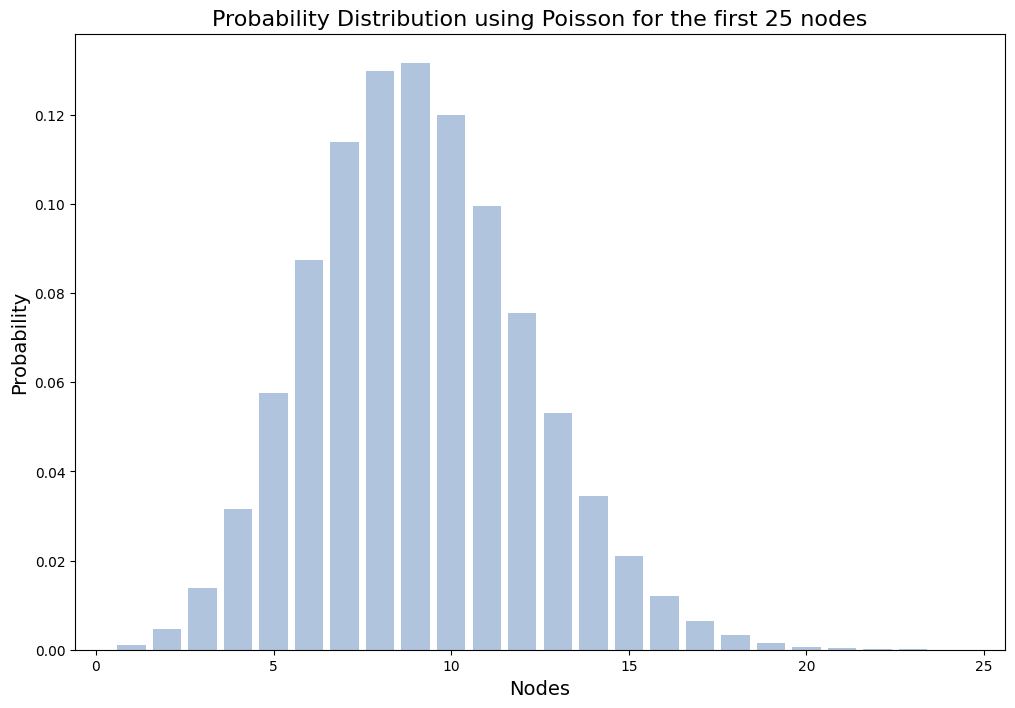

In [ ]:
# plot the distirbution for the 25 nodes
knodes = np.arange(1,9118)
kprobabilities = np.array([np.exp(-k_avg)*np.power(k_avg,k)/math.factorial(int(k)) for k in knodes if k < 25])

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(knodes[:24],kprobabilities,color='lightsteelblue')
ax.set_xlabel('Nodes',size=14)
ax.set_ylabel('Probability', size=14)
ax.set_title('Probability Distribution using Poisson for the first 25 nodes', size = 16)
plt.show()

### B. Paths
Generate a random network with 200 nodes and average degree of 1.5.
From number of nodes and average degree we can compute the probability $p=\frac{\langle d \rangle}{N-1}$

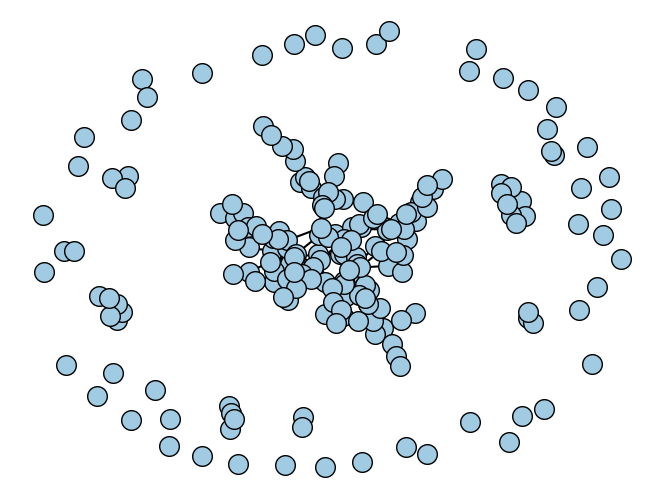

In [ ]:
p = 1.5/(200-1) # given average degree = prob * (N-1)
RandNetw = nx.fast_gnp_random_graph(200,p)
nx.draw(RandNetw, \
        node_size=200, \
        width = 1.5, \
        with_labels=False, \
        font_size = 7, \
        font_color = 'black', \
        cmap = 'lightsteelblue', \
        edgecolors='#000000', \
        node_color = "#A0CBE2")
plt.show()

__Remark :__ There are many isolated nodes and a giant component, we may assume the network's regime is supercritical.

* Extract __Giant Connected Component__ , GCC

In [ ]:
# according to networkx.org the function connected_component_subgraphs is deprecated
_ = sorted(nx.connected_components(RandNetw),key=len,reverse=True) # taken from StackOverflow
GCC = RandNetw.subgraph(_[0])

* __Random Node from GCC__ :

In [ ]:
nodes_array = np.array(GCC.nodes())
random_node = np.random.choice(nodes_array)
node0 = nx.single_source_shortest_path_length(GCC,random_node,0) # our random node it is at distance 0 from itself
print(f'Our randomly chosen node is : node {random_node}')

Our randomly chosen node is : node 124


* __Nodes that are exactly 2 steps away from the chosen random node__ :
<br>We have to drop nodes that are 1 step away from the chosen random node

In [ ]:
nodes_dict = nx.single_source_shortest_path_length(GCC,random_node,2) #dictionary with keys - nodes, values - distance
two_steps_away_nodes = [i for i in nodes_dict.keys() if nodes_dict[i]==2]
print(f'The nodes that are exactly 2 steps away from node {random_node} are :\n', \
      two_steps_away_nodes)

The nodes that are exactly 2 steps away from node 124 are :
 [144, 37]


* __GCC Plot__

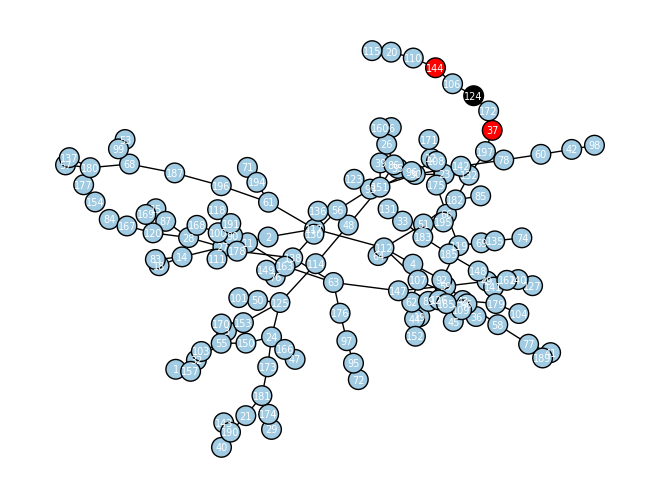

In [ ]:
defined_colors = []

for node in GCC:
    if node in node0:
        defined_colors.append("#000000")
    elif node in two_steps_away_nodes:
        defined_colors.append("#ff0000")
    else: 
        defined_colors.append("#A0CBE2")

nx.draw(GCC, node_size=200, node_color=defined_colors, width = 1, with_labels = True, font_size = 7, font_color = "white", edgecolors = "#000000", node_shape="o")
plt.show()

# Part 3: Watts-Strogatz Networks

**A. Effect of rewiring probability**
3 different graphs are generated with 500 nodes and average degree 4. The rewiring probabilities are p = 0, 0.1 and 1. The average shortest path length is calculated for each graph. 

In [ ]:
seed = 42
Gl = nx.connected_watts_strogatz_graph(500, 4, 0, seed=seed)

We utilize the following function to create 3 distinct graphs with $p \in \{0,0.1,1\}$. We also create a seed to be able to reproduce the same results. This function will later on be used as a base to create a more general function that creates *n* number of graphs that have probabilities in a dictionary.

Average shortest distance for p = 0:  62.75
Average shortest distance for p = 0.1:  6.536
Average shortest distance for p = 1:  4.61


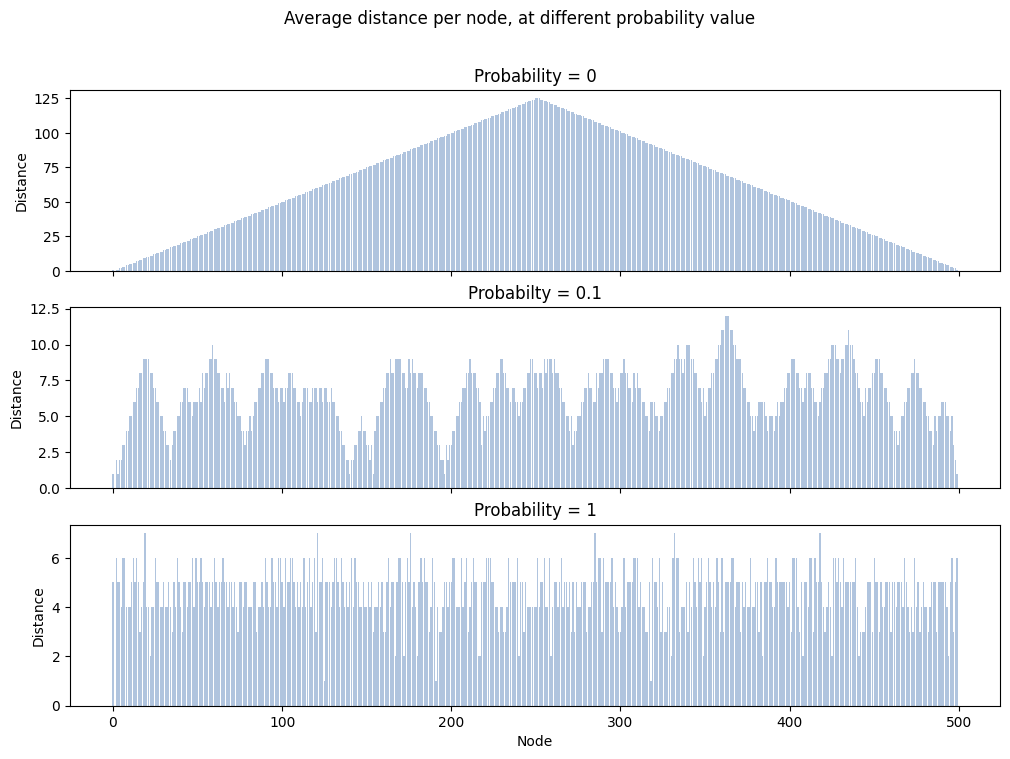

In [ ]:
# Name might not make sense to the functionality of the function.
def test_omega():
    """
    function that creates 3 distinct Watts Strogatz graphs with 500 nodes, an average of 4 degrees and 
    probabilities of 0, 0.1 and 1. The function creates a bar plot of the values and also prints the
    shortes path.

    Input: None
    ------------

    Output: 3 matplotlib bar plots
    """
    Gl = nx.connected_watts_strogatz_graph(500, 4, 0, seed=seed)
    Gr = nx.connected_watts_strogatz_graph(500, 4, 1, seed=seed)
    Gs = nx.connected_watts_strogatz_graph(500, 4, 0.1, seed=seed)


    pathl = dict(nx.shortest_path_length(Gl))
    pathr = dict(nx.shortest_path_length(Gr))
    paths = dict(nx.shortest_path_length(Gs))

    fig, ax = plt.subplots(3, figsize=(12,8), sharex=True)

    ax[0].bar(pathl[1].keys(),pathl[1].values(),color='lightsteelblue')
    # ax[0].plot(pathl[1].values(),pathl[1].keys())
    ax[0].set_title('Probability = 0')
    ax[2].bar(pathr[1].keys(),pathr[1].values(),color='lightsteelblue')
    # ax[1].plot(pathr[1].values(),pathl[1].keys())
    ax[2].set_title('Probability = 1')
    ax[1].bar(paths[1].keys(),paths[1].values(),color='lightsteelblue')
    # ax[2].plot(paths[1].values(),pathl[1].keys())
    ax[1].set_title('Probabilty = 0.1')
    ax[2].set_xlabel('Node')
    for i in range(3):
        ax[i].set_ylabel('Distance')
    fig.suptitle('Average distance per node, at different probability value')
    print('Average shortest distance for p = 0: ',sum(pathl[1].values())/len(pathl[1]))
    print('Average shortest distance for p = 0.1: ',sum(paths[1].values())/len(paths[1]))
    print('Average shortest distance for p = 1: ',sum(pathr[1].values())/len(pathr[1]))

test_omega()

The result shows that when $p = 1$ the path length decreases rapidly. Once $p = 1$ the network turns into a random network with low clustering and thus it demonstrates the small-world phenomenon since the average shortest path length gets very small.

**B. Behaviour of Watts-Strogratz**

50 networks are generated for each $p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}$ with $N = 500$ and $<k> = 4$. For each 50 networks with the same $p$ the average of the average shortest path length is calculated as well as the standard deviation. The result is plotted and errorbars are added using the standard deviation.

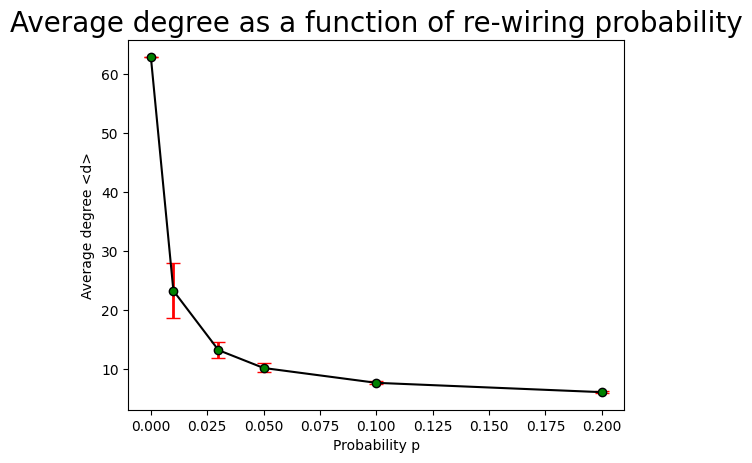

In [ ]:
N = 500
k = 4
G = []
err = []
prop = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
for p in prop:
    t = []
    for i in range(0,50):
        #Calculating the average path length
        t.append(nx.average_shortest_path_length(nx.watts_strogatz_graph(N, k, p)))
    nt = np.array(t)
    #Average of the average path lengths
    G.append(np.mean(nt))
    #standard deviation of the average path lengths
    err.append(np.std(nt))

# Plotting the result
fig = plt.figure()
plt.errorbar(prop, G, yerr = err,ecolor = 'r', elinewidth = 2, capsize=5, color = 'k', marker = 'o', markerfacecolor = 'g')
plt.title('Average degree as a function of re-wiring probability', fontsize=20)
plt.ylabel('Average degree <d>')
plt.xlabel('Probability p')
plt.show()

As seen from the plot in "Average degree as a function of re-wiring probability" the average path length decreases very quickly with increasing p. This demonstrates how the small-world phenomonon is quickly generated since adding only a few links across the network dramatically decreases the path length.  

# Part 4. The Barabasi-Albert Model

**A. Manually creating a 100 node BA network**

A 100 node BA network is created by adding one node at a time and connecting it to an existing node in proportion to the degree. The network is presented in the figure "100 node BA network" using NetworkX.

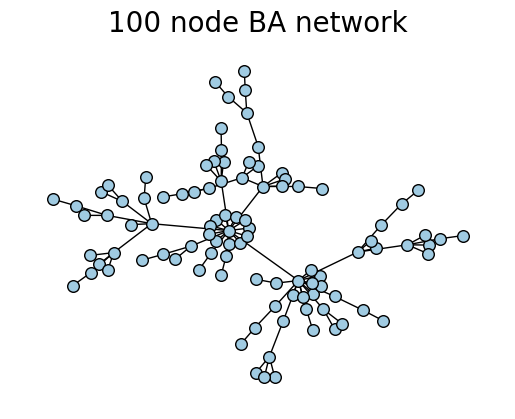

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2])
G.add_edges_from([(1,2)])

for i in range(3,101):
    G.add_node(i)
    elements = []
    for x,y in list(G.edges()):
        elements.append(x)
        elements.append(y)
    m = random.choice(elements)
    G.add_edge(i,m)

plt.figure()
plt.title('100 node BA network', fontsize=20)
nx.draw(G, node_size = 70, with_labels = False, node_color = "#A0CBE2", edgecolors = "black")

**B. Manually creating a 5000 node BA network**
Now the same procedure is followed to create a 5000 node BA network. Shown in the code below.

In [ ]:
# Creating the network
G = nx.Graph()
G.add_nodes_from([1,2])
G.add_edges_from([(1,2)])

for i in range(3,5001):
    G.add_node(i)
    elements = []
    for x,y in list(G.edges()):
        elements.append(x)
        elements.append(y)
    m = random.choice(elements)
    G.add_edge(i,m)

The maximum and minimum degree of the graph is found:

In [ ]:
degrees = [G.degree(n) for n in G.nodes()];
max_deg  = np.max(degrees)
min_deg = np.min(degrees)
print(f'Max degree is: {max_deg}\nMin degree is: {min_deg}')

Max degree is: 108
Min degree is: 1


Now the degree distribution is binned using *numpy.histogram*. The distribution is plotted using both a plot with linear and log-log axes.

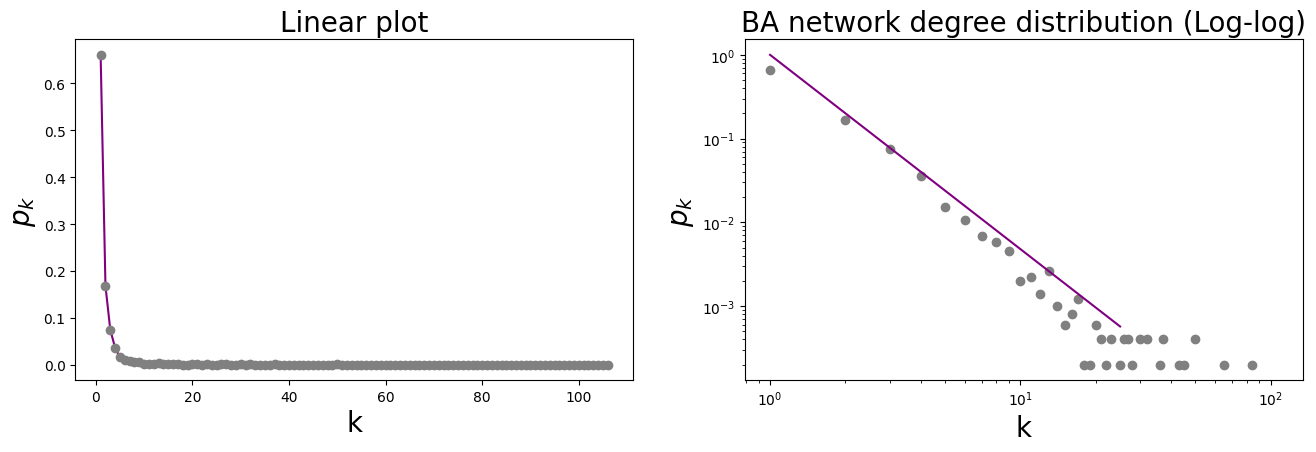

In [ ]:
# Binning the degree distribution
b = np.arange(min_deg,max_deg,1)
freq, degree = np.histogram(degrees, bins = b);
p_k = [i/np.sum(freq) for i in freq]

# Plotting the distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
fig.tight_layout()
ax1.set_title('Linear plot', fontsize = 20)
ax1.set_xlabel('k', fontsize = 20)
ax1.set_ylabel('$p_{k}$', fontsize = 20)
ax1.plot(degree[:-1], p_k, c = 'purple', marker = 'o', markerfacecolor = 'grey', markeredgecolor = 'grey');

# Fitting a straight line using regression
p_test = [p**(-2.32) for p in degree[:25]]
z = np.polyfit(np.log10(degree[:10]), np.log10(p_k[:10]), 1)
p = np.poly1d(z)
ax2.plot(degree[:25], p_test, c = 'purple')

# making plot
ax2.set_title('BA network degree distribution (Log-log)', fontsize = 20)
ax2.set_xlabel('k', fontsize = 20)
ax2.set_ylabel('$p_{k}$', fontsize = 20)
ax2.set_xscale("log");
ax2.set_yscale("log");
ax2.scatter(degree[:-1], p_k, c = 'grey');
plt.subplots_adjust(wspace = 0.2)


The Log-Log plot of the BA network degree distribution clearly shows that the distribution follows a power law. To confirm this point a linear regression is performed on the log transformed data $log(p_k) = \gamma log(k)$. On the data this gives $\gamma = 2.32$, which is used to draw the trend line on the plot.

In [ ]:
print('Power law fit:',p)

Power law fit:  
-2.449 x - 0.06874


# Part 5. Power-laws and the friendship paradox

**A. The friendship paradox in BA Networks**

We now explore the network from part 4. A node is picked at random and its degree is compared with the average degree of its neighbors. This experiment is repeated a 1000 times:

In [ ]:
F_BA = G

count = 0
for j in range(0,1000):
    # picking random node
    i = random.choice(list(F_BA.nodes()))
    deg_i = F_BA.degree(i)

    # Getting neighbors of random node i
    nb_i = F_BA.adj[i] 

    # Calculating degree of neighbors
    deg = [x[1] for x in F_BA.degree(nb_i)]
    avg_deg = np.mean(deg)
    
    if deg_i < avg_deg:
        count+=1
print('This experiment shows that the fraction of time the friendship paradox holds for the F-BA is:',count/1000)

This experiment shows that the fraction of time the friendship paradox holds for the F-BA is: 0.855


**B. The friendship paradox more generally**

__*What if the power law is flatter? Will the fraction of times the paradox is true be higher or lower?*__

When the $\gamma$ value gets smaller the chance of getting nodes with high degrees increases - resulting in the formation of bigger hubs. This must mean that the fraction of times the paradox holds will increase. 

To investigate this a network with a power law degree distribution is generated using the configuration model and following the tips from the exercise. Here a network with $\gamma = 1.5$ and $N = 5000$ nodes is generated. We here generate the random power law distributed number to be used in the configuration model by following the proposed method in the exercise. Since it follows a power law $x_{min} = 1$ and $\alpha = 1.5$ since it mirrors the slope.

In [ ]:
r = [random.uniform(0,1) for i in range(0,5000)]
xmin = 1
alpha = 1.5

x = [xmin*(1-a)**(-1/(alpha-1)) for a in r]
x = [round(i)  for i in x]
if np.mod(np.sum(x),2) > 0:
    x[1] = x[1]+1

In [ ]:
F_CM = nx.configuration_model(x)

The new network is tested with same method as before to see the fraction of times the friendship paradox holds:

In [ ]:
count = 0
for j in range(0,1000):
    # picking random node
    i = random.choice(list(F_CM.nodes()))
    deg_i = F_CM.degree(i)

    # Getting neigbours of random node i
    nb_i = F_CM.adj[i] 

    # Calcilating degree of neigbours
    deg = [x[1] for x in F_CM.degree(nb_i)]
    avg_deg = np.mean(deg)
    
    if deg_i < avg_deg:
        count+=1
print('fraction of time the friendship paradox holds:' ,count/1000)

fraction of time the friendship paradox holds: 0.965


This clearly shows that the friendship paradox indeed holds more often on a graph with a flatter power law degree distribution.

__*Generate network with same slope and number of nodes as F-BA*__

The slope of F-BA is found to be 2.32 in Part 4 and the network has 5000 nodes. A network F-CM is generated using the configuration model with the same slope and number of nodes:

In [ ]:
r = [random.uniform(0,1) for i in range(0,5000)]
xmin = 1
alpha = 2.32

x = [xmin*(1-a)**(-1/(alpha-1)) for a in r]
x = [round(i) for i in x]


if np.mod(np.sum(x),2) > 0:
    x[1] = x[1]+1
F_CM = nx.configuration_model(x)

count = 0
for j in range(0,1000):
    # picking random node
    i = random.choice(list(F_CM.nodes()))
    deg_i = F_CM.degree(i)

    # Getting neigbours of random node i
    nb_i = F_CM.adj[i] 

    # Calcilating degree of neigbours
    deg = [x[1] for x in F_CM.degree(nb_i)]
    avg_deg = np.mean(deg)
    
    if deg_i < avg_deg:
        count+=1
print('fraction of time the friendship paradox holds for F-CM:' ,count/1000)

fraction of time the friendship paradox holds for F-CM: 0.911


This shows that the fraction of time that the friendship pradox holds for F-CM is somewhat similar to F-BA. 

__*If F-BA and F-CM have the same degree distribution are they different in terms of the friendship paradox? Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true?*__

Apart from the degree-distribution something that could have an impact on the friendship paradox is a correlation or assortativity between the degrees of adjacent nodes. A tendency for nodes to attach to nodes that are similar in some way would definetly affect the friendship paradox. ["The friendship paradox in real and model networks" (https://academic.oup.com/comnet/article/9/2/cnab011/6287259?login=true).] 


__*How would you test if the friendship paradox is equally often true in F-BA and F-CM?*__

Calculating mean and standard deviation of the number of times the friendship paradox holds. This can be done by repeating the method used in **A** multiple times and noting the result (the fraction of times the friendship paradox holds) each time and calculating the mean value and standard deviation over all results. From this it would be able to see if there is a difference between F-BA and F-CM.

# Part 6. Growth without Preferential Attachment

A Sune-network is grown with 5000 nodes where each node is connected to the existing network with equal probability.

In [ ]:
Sune = nx.Graph()
Sune.add_nodes_from([1,2])
Sune.add_edges_from([(1,2)])

# growing the network
for i in range(3,5001):
    m = random.choice(list(Sune.nodes()))
    Sune.add_node(i)
    Sune.add_edge(i,m)

# finding the maximum and minimum degree
degrees = [Sune.degree(n) for n in Sune.nodes()];
max_deg  = np.max(degrees)
min_deg = np.min(degrees)
print('Max degree is:', max_deg, 'Min degree is:', min_deg)
# Binning the degree distribution
b = np.arange(min_deg,max_deg,1)
freq, degree_sune = np.histogram(degrees, bins = b);
p_k_sune = [i/np.sum(freq) for i in freq]


Max degree is: 13 Min degree is: 1


Now an ER network of 5000 nodes is generated with $p = \frac{k}{N-1} = \frac{2}{5000-1} = 0.4\cdot 10^{-3}$ such that the probability is the same as in the Sune-network.

In [ ]:
N = 5000
k = 2
p = k/(N-1)
er = nx.erdos_renyi_graph(N,p)

# finding the maximum and minimum degree
degrees = [er.degree(n) for n in er.nodes()];
max_deg  = np.max(degrees)
min_deg = np.min(degrees)
print('Max degree is:', max_deg, 'Min degree is:', min_deg)

# Binning the degree distribution
b = np.arange(min_deg,max_deg,1)
freq, degree_er = np.histogram(degrees, bins = b);
p_k_er = [i/np.sum(freq) for i in freq]

Max degree is: 8 Min degree is: 0


Now to investigate the differences between the ER and the Sune-network the two degree distributions are plotted:

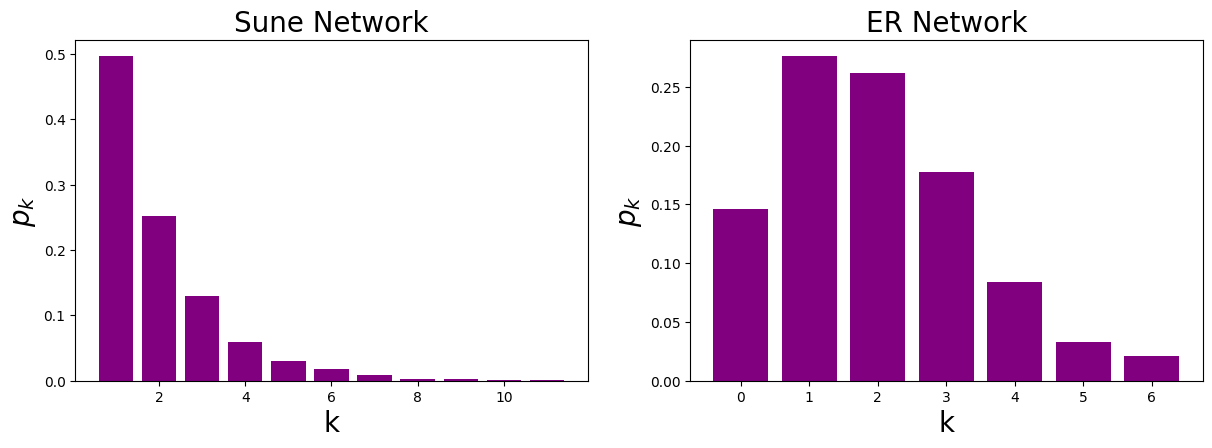

In [ ]:
# Plotting

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()
ax1.set_title('Sune Network', fontsize = 20)
ax1.set_xlabel('k', fontsize = 20)
ax1.set_ylabel('$p_{k}$', fontsize = 20)
ax1.bar(degree_sune[:-1], p_k_sune, color = 'purple');
#ax1.plot(degree_sune[:-1], p_k_sune, color = 'purple');
#ax1.plot(degree_er[:-1], p_k_er, color = 'green');


ax2.set_title('ER Network', fontsize = 20)
ax2.set_xlabel('k', fontsize = 20)
ax2.set_ylabel('$p_{k}$', fontsize = 20)
ax2.bar(degree_er[:-1], p_k_er, color = 'purple');
plt.subplots_adjust(wspace = 0.2)

Since the ER network is a random network it follows a Poisson degree distribution with $\lambda = 2$ since $k = 2$.

In [ ]:
print('Connected components in Sune network:',nx.number_connected_components(Sune))
print('Connected components in ER network:',nx.number_connected_components(er))


Connected components in Sune network: 1
Connected components in ER network: 871


We notice that there are many connected components in  ER network, which is expected. We may assume that the ER network is in supercritical regime, as some of the nodes are not part of the connected components. 

However, the BA contains 1 connected component, and that all nodes are part of it. This means that the BA graph is one giant connected component which contains hubs and the node links follow the preferrential attachment law to the hubs.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20f2e94b-07d5-4e85-8fed-cc33038c339c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>